In [1]:
import pandas as pd
import math
import random as rd
import matplotlib.pyplot as plt
import numpy as np


In [2]:



clientes = int(input());
tempo_medio_entre_chegadas = float(input());
tempo_atendimeno =  float(input());

l = 1 / tempo_medio_entre_chegadas;
u = 1 / tempo_atendimeno;
p = l/u;

tabel = pd.DataFrame({'Dados':[clientes , tempo_medio_entre_chegadas , tempo_atendimeno , l , u , p]})

tabel.index = ['Nº de Clientes' , 'Tempo médio entre chegadas /minuto', 'Tempo de atendimento / min' , 'Taxa de chegada  (λ)' , 'Nível de Serviço (μ)' , 'ρ']




print(tabel)


                                     Dados
Nº de Clientes                      1000.0
Tempo médio entre chegadas /minuto     1.0
Tempo de atendimento / min             0.5
Taxa de chegada  (λ)                   1.0
Nível de Serviço (μ)                   2.0
ρ                                      0.5


In [3]:
def generate_simulation(dados):
    
    ## ri = intervalo de tempo entre chegadas
    ## si = tempo de atendimento(duração)
    ## ai = instante da chegada 
    ## bi = inicio do atendimento
    ## ei = fim de atendimento 
    ## wi = tempo de espera na fila
    ## ui = tempo total no sistema
    ## oi = ociosidade do servidor simulado
    ## wq = tempo médio de fila simulado
    ri =0
    si =0
    ai =0
    bi =0 
    ei =0 
    wi =0 
    ui =0 
    oi =0
    wq =0
    m= 0
    dados.loc[0] = [0,0,0,0,0,0,0,0,0,0]

    for i in range(1,clientes):
    
    
    
       if(i > 0):
       
        ln_ri = (math.log (1-(rd.uniform(0,l)/l))) * (-1)
        
        ln_si = (math.log (1-(rd.uniform(0,u)/u))) * (-1)
        
        ri = ln_ri/l
        
        si = ln_si/u
     
       else:
        
         ri =0
         si =0
    
       ai = ri + ai
       
       bi = max(ai,ei)
       
       oi = bi - ei
       
       ei = bi + si
       
       wi = bi-ai
       
       ui = ei - bi
       
       wq +=wi
  
       if(i>0):
      
         m = wq / i
                
       dados.loc[i] = [i,ri,si,ai,bi,ei,wi,ui,oi,m]
    
    
    

In [4]:
def generate_frequency_plots(dados, wq_teorico):
    
    
   
    
    
    dados_aux_ri = pd.DataFrame(dados["Intervalo de tempo entre chegadas"])
    dados_aux_si = pd.DataFrame(dados["Tempo de atendimento(duração)"])
    dados_aux_wi = pd.DataFrame(dados["Tempo de espera na fila"])
    dados_aux_ui = pd.DataFrame(dados["Tempo Total no Sistema"])
    dados_aux_oi = pd.DataFrame(dados["Ociosidade Servidor Simulado"])
    dados_aux_wq = pd.DataFrame(dados["Tempo médio da fila simulado"])
    
    
    
    
    intervalos = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11.0, 11.5, 12, 12.5, 13]

    label_chegada = ['0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0', '4.0-4.5', '4.5-5.5', '5.5-6.0', '6.0-6.5', '6.5-7.0', '7.0-7.5', '7.5-8.0', '8.0-8.5', '8.5-9.0', '9.0-9.5', '9.5-10.0', '10.0-10.5', '10.5-11.0', '11.0-11.5', '11.5-12.0', '12.0-12.5', '12.5-13.0']

    
    dados_aux_ri['Intervalos'] = pd.cut(dados_aux_ri["Intervalo de tempo entre chegadas"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_si['Intervalos'] = pd.cut(dados_aux_si["Tempo de atendimento(duração)"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_wi['Intervalos'] = pd.cut(dados_aux_wi["Tempo de espera na fila"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_ui['Intervalos'] = pd.cut(dados_aux_ui["Tempo Total no Sistema"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_oi['Intervalos'] = pd.cut(dados_aux_oi["Ociosidade Servidor Simulado"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_wq['Intervalos'] = pd.cut(dados_aux_wq["Tempo médio da fila simulado"],bins=intervalos,labels=label_chegada, right=False)
    
    freq_ri = dados_aux_ri['Intervalos'].value_counts().sort_index()
    freq_si = dados_aux_si['Intervalos'].value_counts().sort_index()
    freq_wi = dados_aux_wi['Intervalos'].value_counts().sort_index()
    freq_ui = dados_aux_ui['Intervalos'].value_counts().sort_index()
    freq_oi = dados_aux_oi['Intervalos'].value_counts().sort_index()
    freq_wq = dados_aux_wq['Intervalos'].value_counts().sort_index()
    
    
    plt.figure(figsize=(10, 10))
    freq_ri.plot(kind='bar', title='Tempo entra chegadas',color = 'blue')
    plt.xlabel('Intervalos de tempo de entra chegadas')
    plt.ylabel('Frequência')
    plt.show()  

    plt.figure(figsize=(10, 10))
    freq_si.plot(kind='bar', title='Tempo de atendimento',color = 'green')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show() 

    plt.figure(figsize=(10, 10))
    freq_wi.plot(kind='bar', title='Tempo de espera na fila',color = 'red')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show()  

    plt.figure(figsize=(10, 10))
    freq_ui.plot(kind='bar', title='Tempo total do sistema', color = 'purple')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show()  

    plt.figure(figsize=(10, 10))
    freq_oi.plot(kind='bar', title='Ociosidade Servidor Simulado', color = 'orange')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show()  

     
    
    plt.figure(figsize=(10, 10))
    
    x = np.arange(1,len(dados_aux_wq['Tempo médio da fila simulado'])+1)
    
    wq_simulado =  dados['Tempo médio da fila simulado']
    
    wq_teorico = np.full(len(wq_simulado), wq_teorico)
    
    
    plt.plot(x, wq_simulado, label='Tempo médio da fila' , color = 'blue', linewidth=2)
    plt.plot(x,wq_teorico, label = 'Tempo médio da fila Teórico', color='red', linestyle='--',linewidth=2)
    plt.title("Tempo médio da fila simulado x Tempo médio da fila teórico", fontsize = 12 , fontweight = 'bold' , pad=10)
    plt.xlabel('Numero de observações')
    plt.ylabel('Tempo médio de fila')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend()
    plt.show()
    
    
    
    


        
        
                
        
    
    
    

In [5]:
dados_simulacao_1 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_2 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_3 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_4 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_5 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])

In [6]:
generate_simulation(dados_simulacao_1)
dados_simulacao_1

,Clientes,Intervalo de tempo entre chegadas,Tempo de atendimento(duração),Instante da chegada,Início do atendimento,Fim de Atendimento,Tempo de espera na fila,Tempo Total no Sistema,Ociosidade Servidor Simulado,Tempo médio da fila simulado
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.622019,0.613071,0.622019,0.622019,1.235090,0.000000,0.613071,0.622019,0.000000
2,2.0,1.274415,1.204789,1.896433,1.896433,3.101222,0.000000,1.204789,0.661343,0.000000
3,3.0,1.331904,0.504611,3.228338,3.228338,3.732948,0.000000,0.504611,0.127115,0.000000
4,4.0,1.171099,0.068908,4.399436,4.399436,4.468345,0.000000,0.068908,0.666488,0.000000
...,...,...,...,...,...,...,...,...,...,...
995,995.0,0.111627,0.657978,978.306355,979.725255,980.383233,1.418900,0.657978,0.000000,0.483716
996,996.0,1.195751,0.458896,979.502106,980.383233,980.842129,0.881127,0.458896,0.000000,0.484115
997,997.0,0.313231,1.153315,979.815337,980.842129,981.995444,1.026792,1.153315,0.000000,0.484659
998,998.0,0.364401,0.342979,980.179738,981.995444,982.338423,1.815706,0.342979,0.000000,0.485993


In [7]:
generate_simulation(dados_simulacao_2)
dados_simulacao_2

,Clientes,Intervalo de tempo entre chegadas,Tempo de atendimento(duração),Instante da chegada,Início do atendimento,Fim de Atendimento,Tempo de espera na fila,Tempo Total no Sistema,Ociosidade Servidor Simulado,Tempo médio da fila simulado
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,1.221417,0.249681,1.221417,1.221417,1.471098,0.000000,0.249681,1.221417,0.000000
2,2.0,2.183627,0.371166,3.405044,3.405044,3.776210,0.000000,0.371166,1.933946,0.000000
3,3.0,0.271168,0.402631,3.676212,3.776210,4.178841,0.099998,0.402631,0.000000,0.033333
4,4.0,0.096377,1.122657,3.772589,4.178841,5.301498,0.406251,1.122657,0.000000,0.126562
...,...,...,...,...,...,...,...,...,...,...
995,995.0,0.167258,0.429306,962.743988,964.142124,964.571430,1.398136,0.429306,0.000000,0.507060
996,996.0,0.078803,0.636461,962.822792,964.571430,965.207892,1.748639,0.636461,0.000000,0.508307
997,997.0,0.958761,0.521875,963.781553,965.207892,965.729767,1.426339,0.521875,0.000000,0.509228
998,998.0,0.952324,0.158057,964.733877,965.729767,965.887823,0.995889,0.158057,0.000000,0.509715


In [8]:
generate_simulation(dados_simulacao_3)
dados_simulacao_3

,Clientes,Intervalo de tempo entre chegadas,Tempo de atendimento(duração),Instante da chegada,Início do atendimento,Fim de Atendimento,Tempo de espera na fila,Tempo Total no Sistema,Ociosidade Servidor Simulado,Tempo médio da fila simulado
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,1.0,1.251791,0.022072,1.251791,1.251791,1.273863,0.0,0.022072,1.251791,0.000000
2,2.0,0.051802,0.332962,1.303593,1.303593,1.636555,0.0,0.332962,0.029729,0.000000
3,3.0,2.044738,0.394833,3.348331,3.348331,3.743164,0.0,0.394833,1.711776,0.000000
4,4.0,0.526297,1.270392,3.874628,3.874628,5.145020,0.0,1.270392,0.131464,0.000000
...,...,...,...,...,...,...,...,...,...,...
995,995.0,0.671649,1.016029,1010.242155,1010.242155,1011.258185,0.0,1.016029,0.647779,0.449565
996,996.0,1.807133,0.009450,1012.049288,1012.049288,1012.058738,0.0,0.009450,0.791103,0.449114
997,997.0,0.661253,0.243991,1012.710541,1012.710541,1012.954533,0.0,0.243991,0.651803,0.448663
998,998.0,0.822599,0.195200,1013.533140,1013.533140,1013.728340,0.0,0.195200,0.578608,0.448214


In [9]:
generate_simulation(dados_simulacao_4)
dados_simulacao_4

,Clientes,Intervalo de tempo entre chegadas,Tempo de atendimento(duração),Instante da chegada,Início do atendimento,Fim de Atendimento,Tempo de espera na fila,Tempo Total no Sistema,Ociosidade Servidor Simulado,Tempo médio da fila simulado
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.406413,0.412201,0.406413,0.406413,0.818613,0.000000,0.412201,0.406413,0.000000
2,2.0,0.286610,0.855864,0.693023,0.818613,1.674477,0.125591,0.855864,0.000000,0.062795
3,3.0,0.527868,0.288963,1.220891,1.674477,1.963440,0.453586,0.288963,0.000000,0.193059
4,4.0,0.632565,0.441202,1.853456,1.963440,2.404642,0.109984,0.441202,0.000000,0.172290
...,...,...,...,...,...,...,...,...,...,...
995,995.0,1.268775,1.666189,988.576714,989.180393,990.846581,0.603679,1.666189,0.000000,0.518859
996,996.0,0.282781,0.098613,988.859495,990.846581,990.945194,1.987086,0.098613,0.000000,0.520333
997,997.0,1.265395,0.543982,990.124890,990.945194,991.489176,0.820304,0.543982,0.000000,0.520634
998,998.0,0.375615,0.056879,990.500505,991.489176,991.546055,0.988672,0.056879,0.000000,0.521103


In [10]:
generate_simulation(dados_simulacao_5)
dados_simulacao_5


,Clientes,Intervalo de tempo entre chegadas,Tempo de atendimento(duração),Instante da chegada,Início do atendimento,Fim de Atendimento,Tempo de espera na fila,Tempo Total no Sistema,Ociosidade Servidor Simulado,Tempo médio da fila simulado
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.760253,0.185762,0.760253,0.760253,0.946015,0.000000,0.185762,0.760253,0.000000
2,2.0,0.214573,0.148170,0.974827,0.974827,1.122997,0.000000,0.148170,0.028812,0.000000
3,3.0,3.086506,0.044383,4.061333,4.061333,4.105716,0.000000,0.044383,2.938336,0.000000
4,4.0,0.719911,0.147446,4.781244,4.781244,4.928691,0.000000,0.147446,0.675529,0.000000
...,...,...,...,...,...,...,...,...,...,...
995,995.0,0.313743,0.025606,987.143340,987.779549,987.805155,0.636210,0.025606,0.000000,0.392792
996,996.0,0.488485,0.326715,987.631825,987.805155,988.131870,0.173330,0.326715,0.000000,0.392572
997,997.0,0.394112,0.922159,988.025936,988.131870,989.054029,0.105934,0.922159,0.000000,0.392285
998,998.0,3.013148,0.896401,991.039084,991.039084,991.935485,0.000000,0.896401,1.985055,0.391892


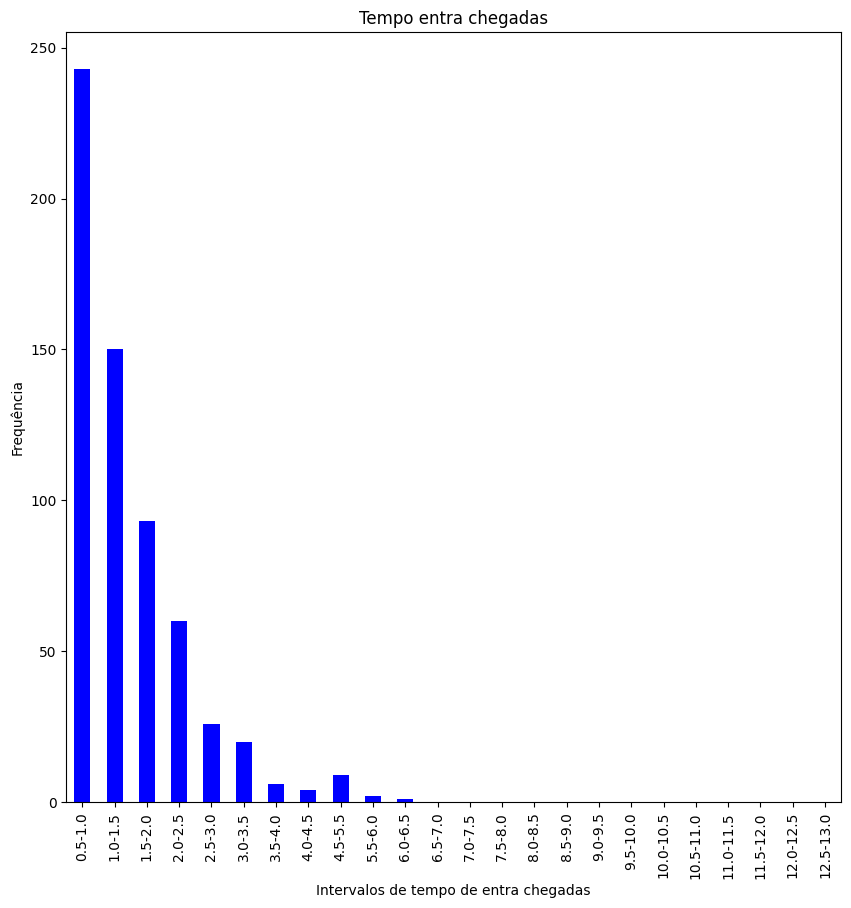

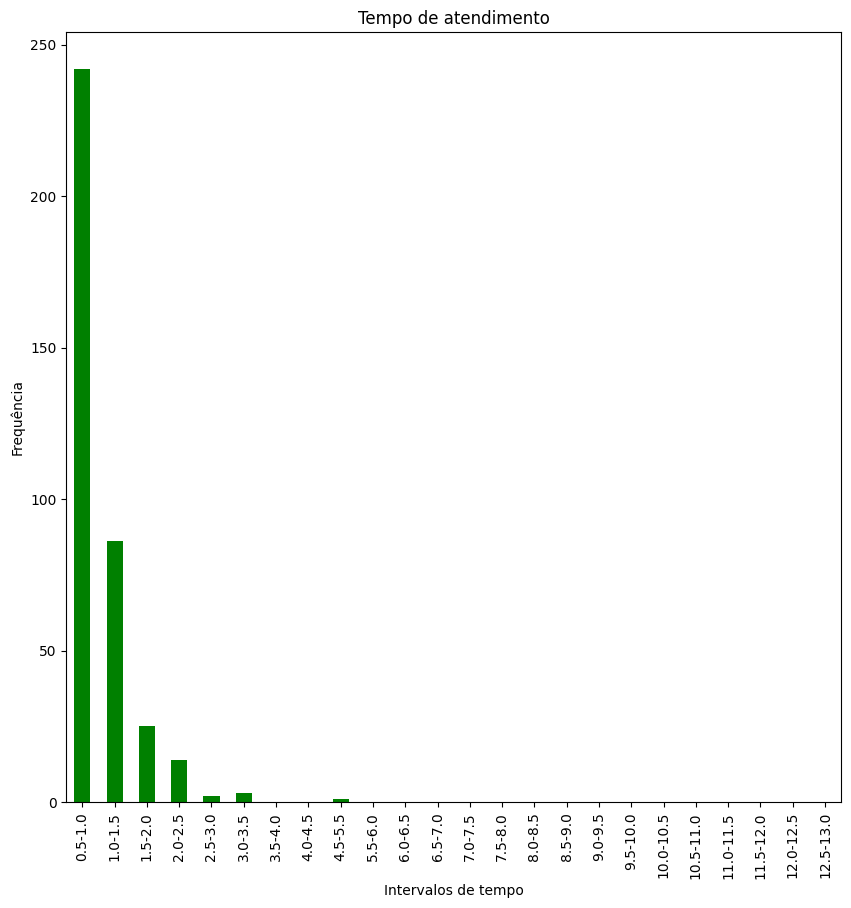

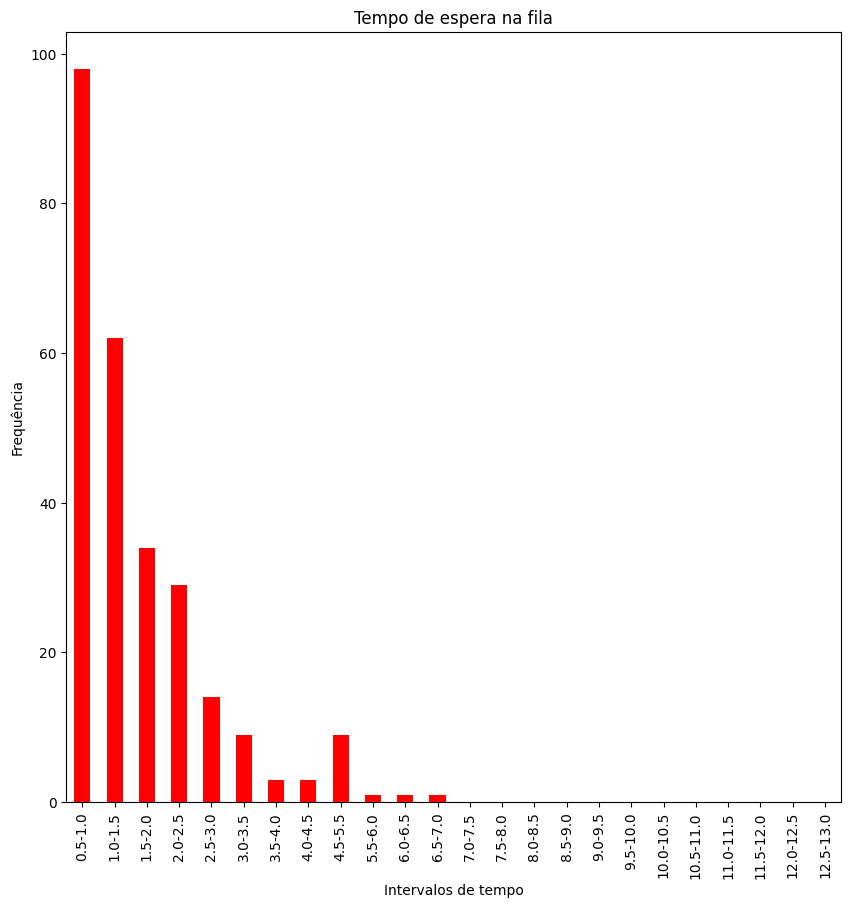

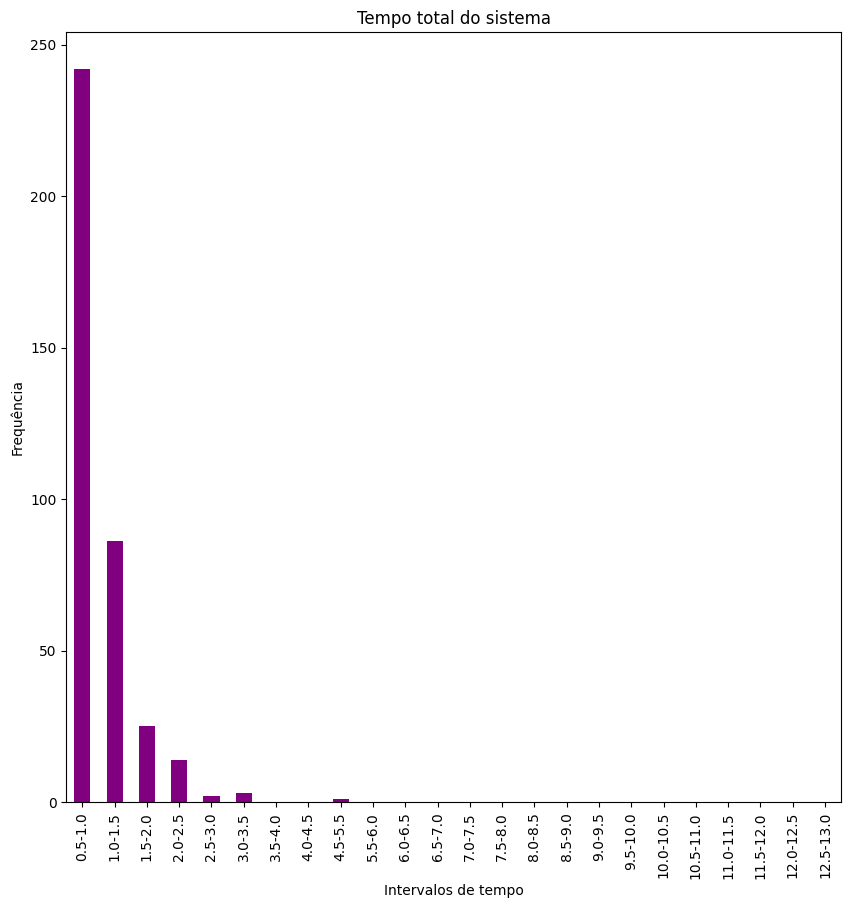

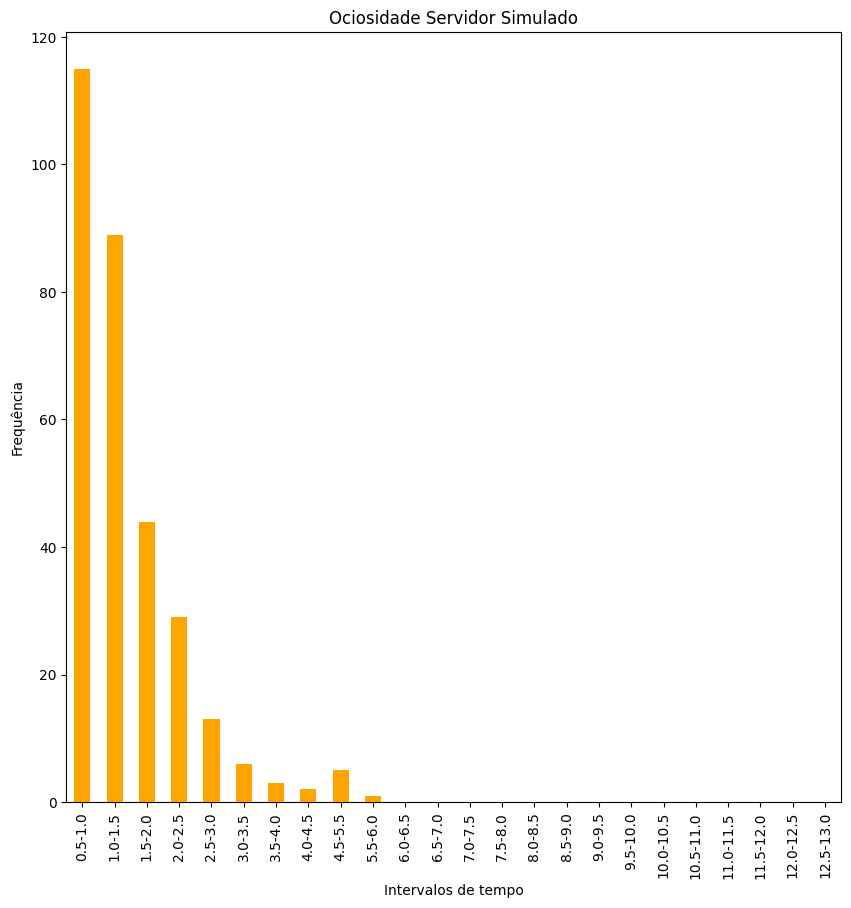

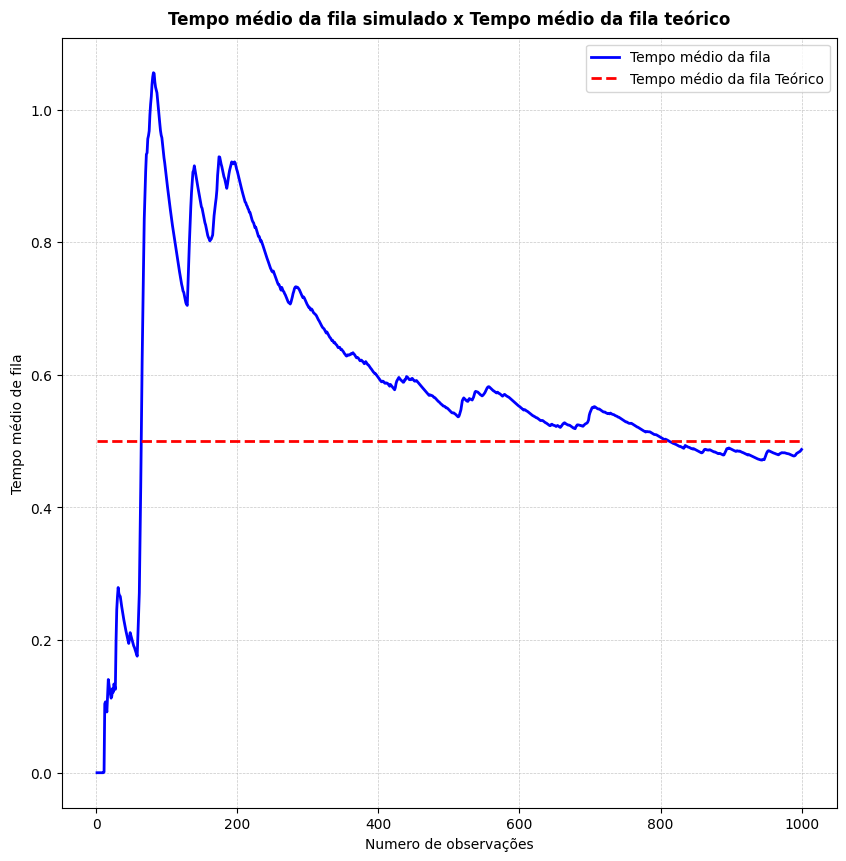

In [11]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_1,wq)

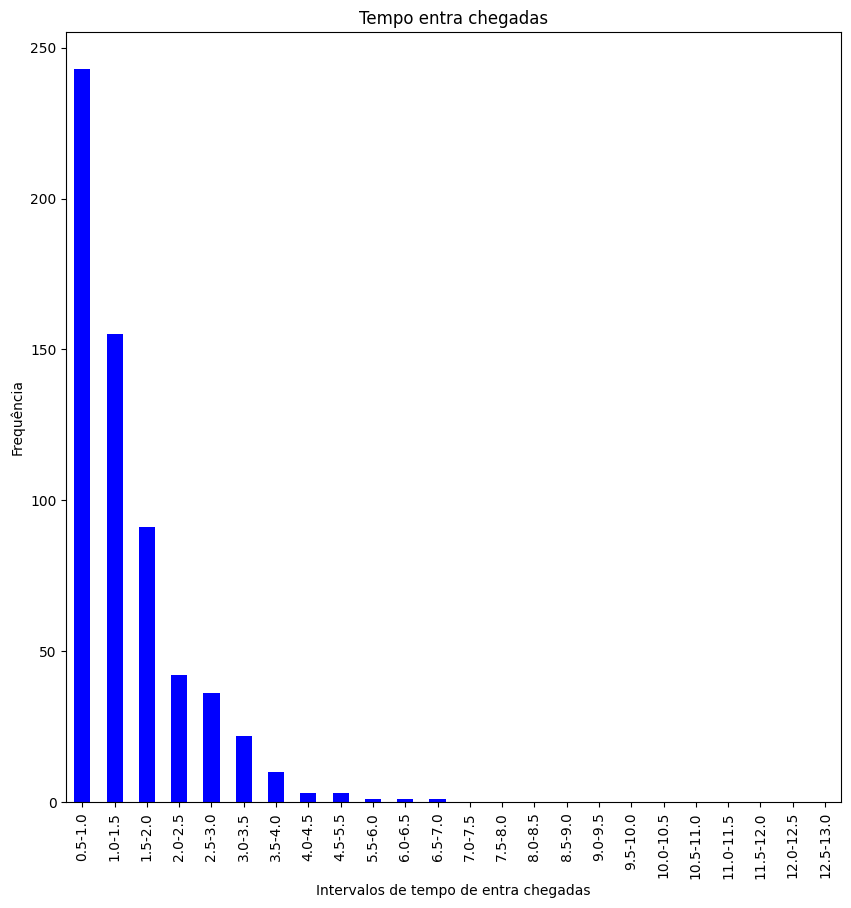

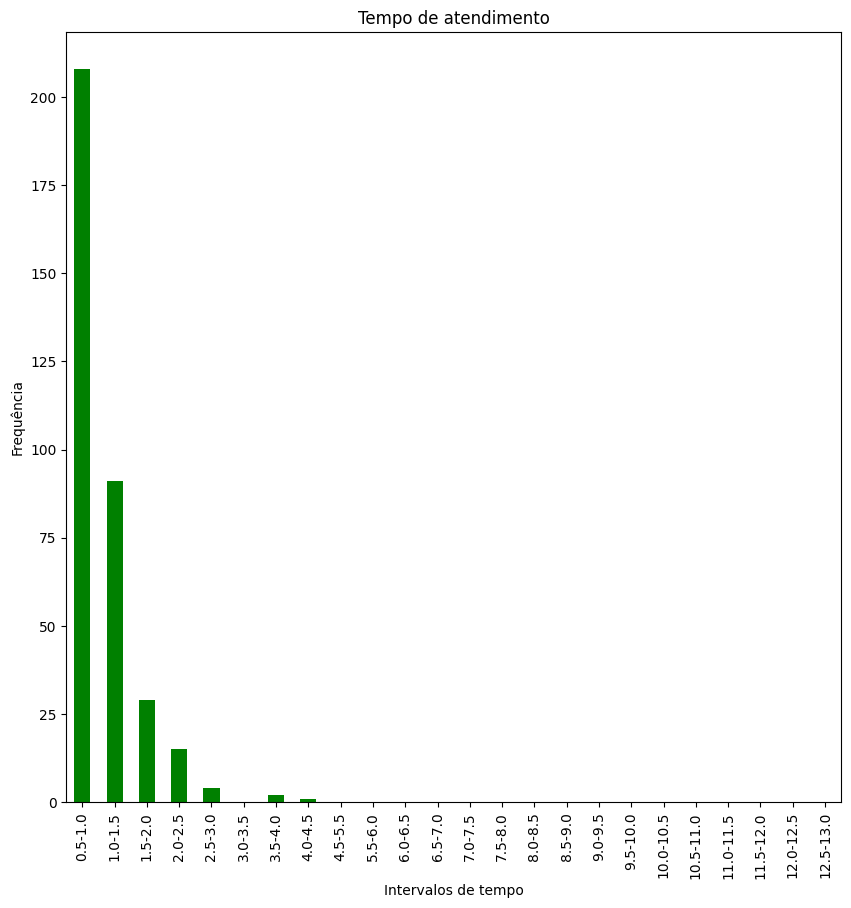

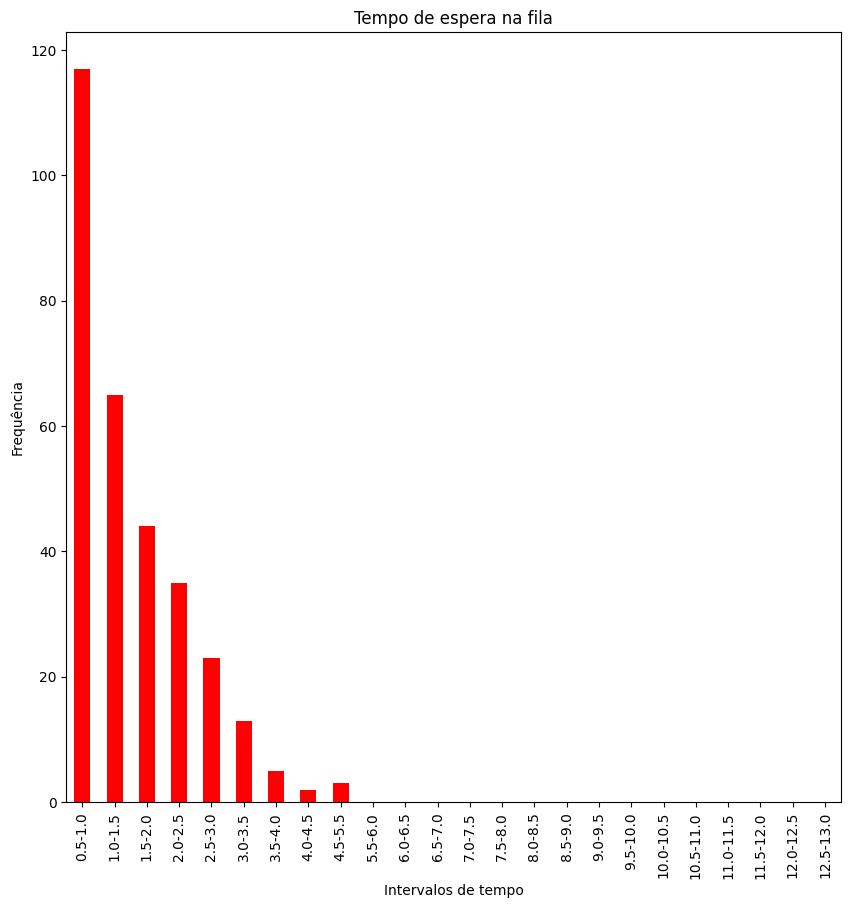

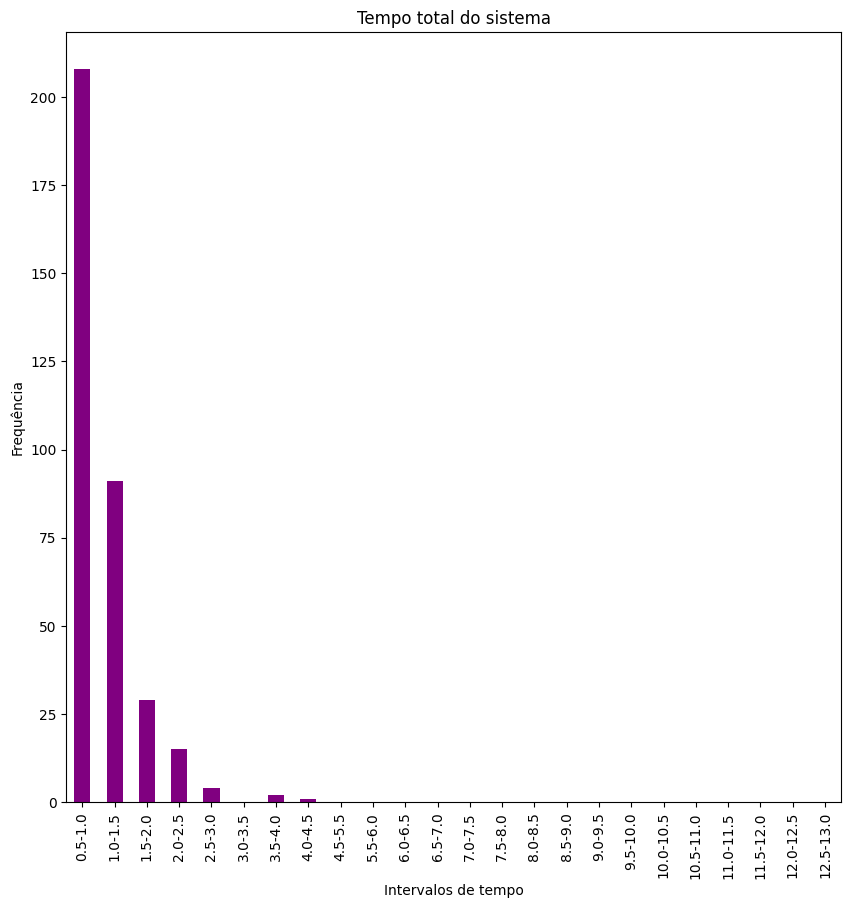

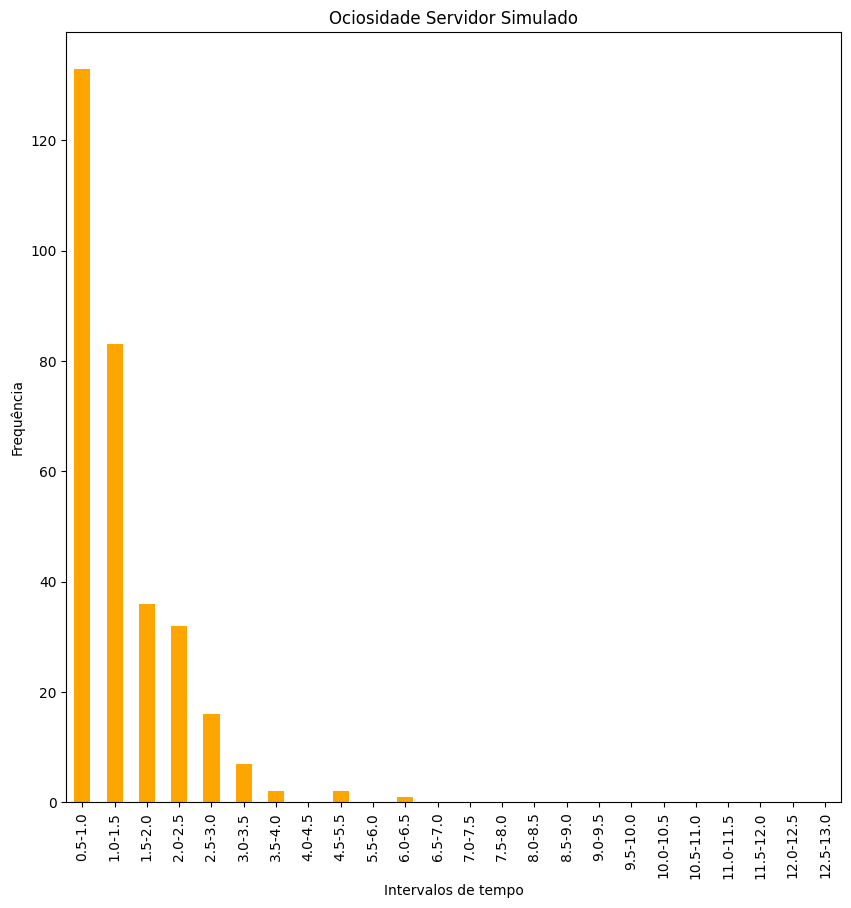

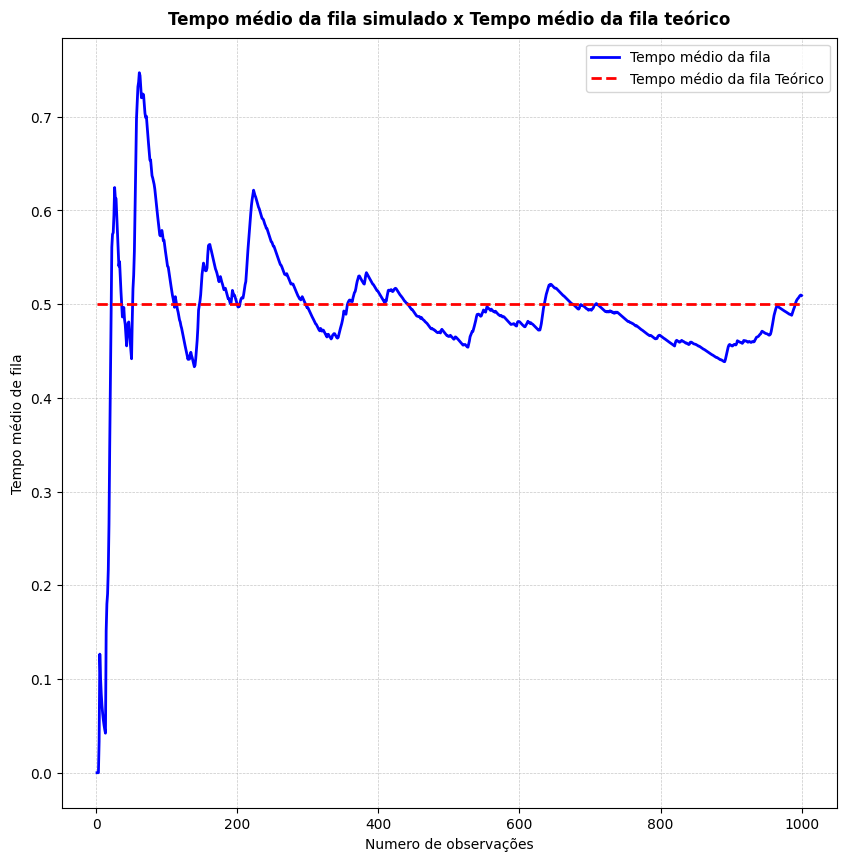

In [12]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_2,wq)

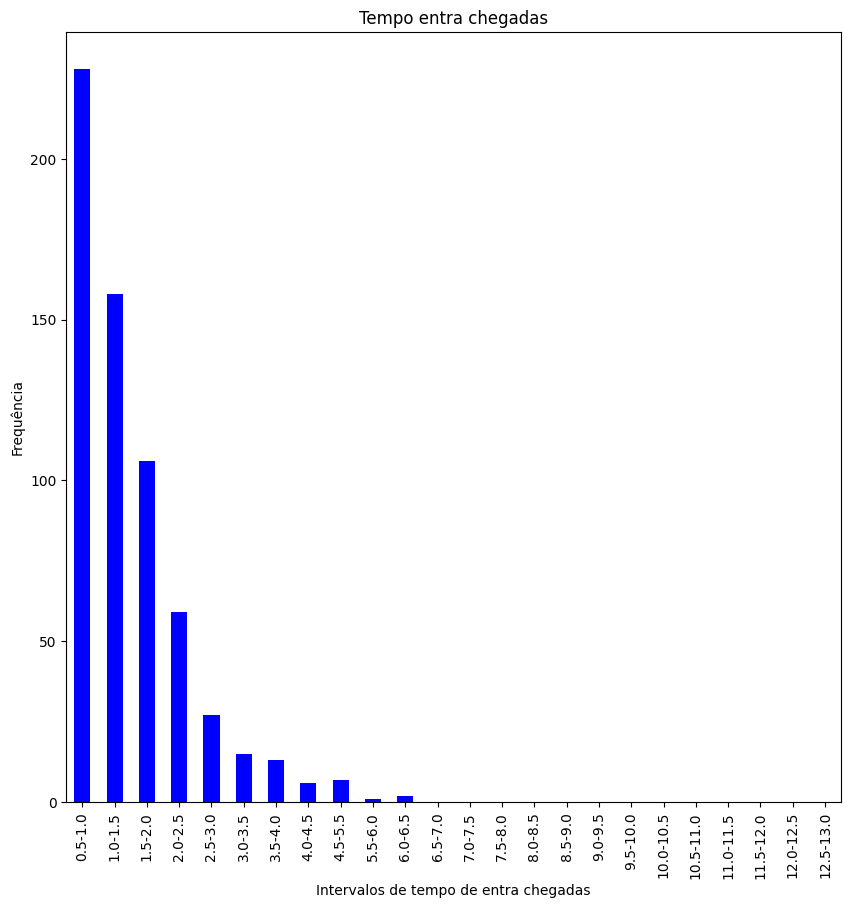

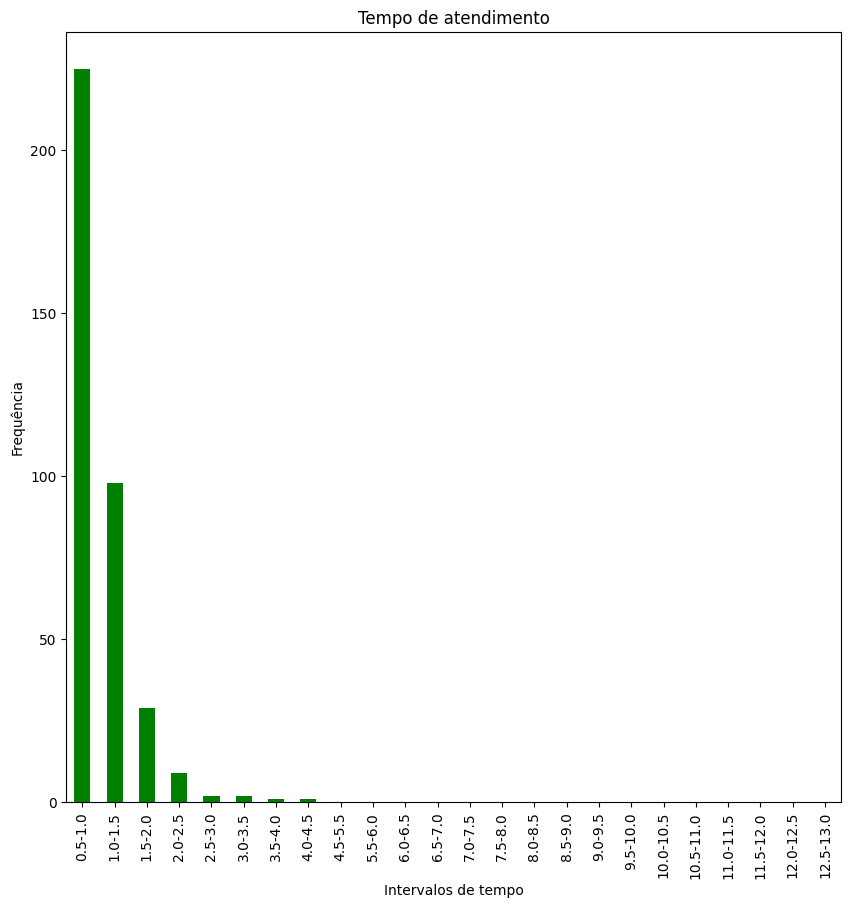

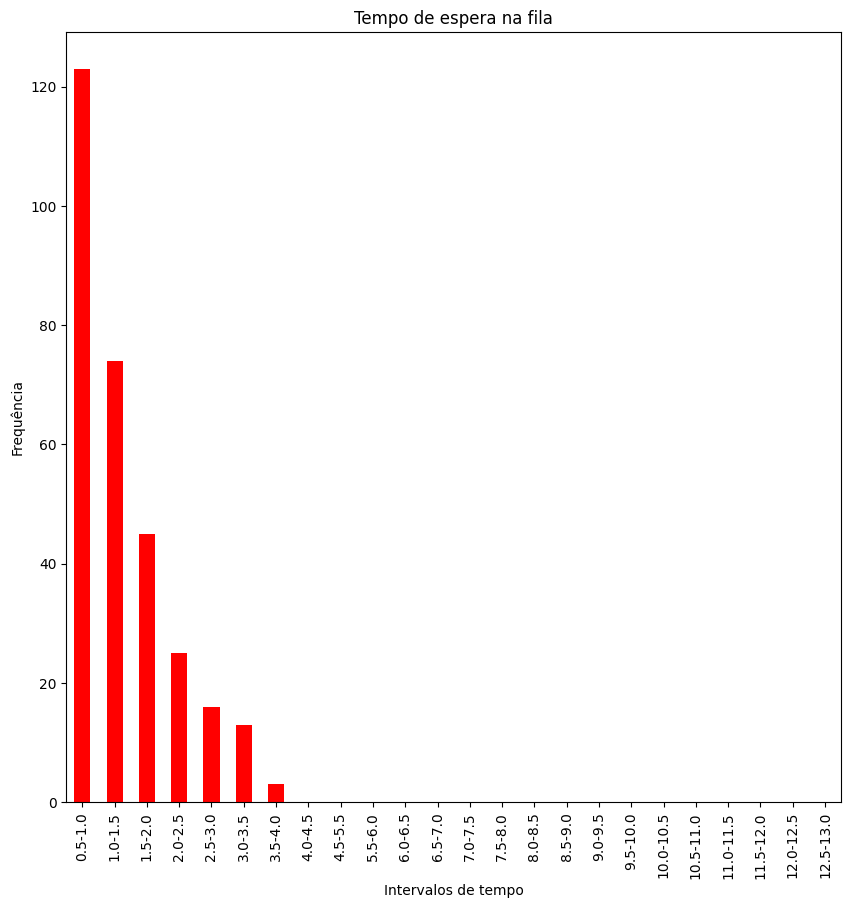

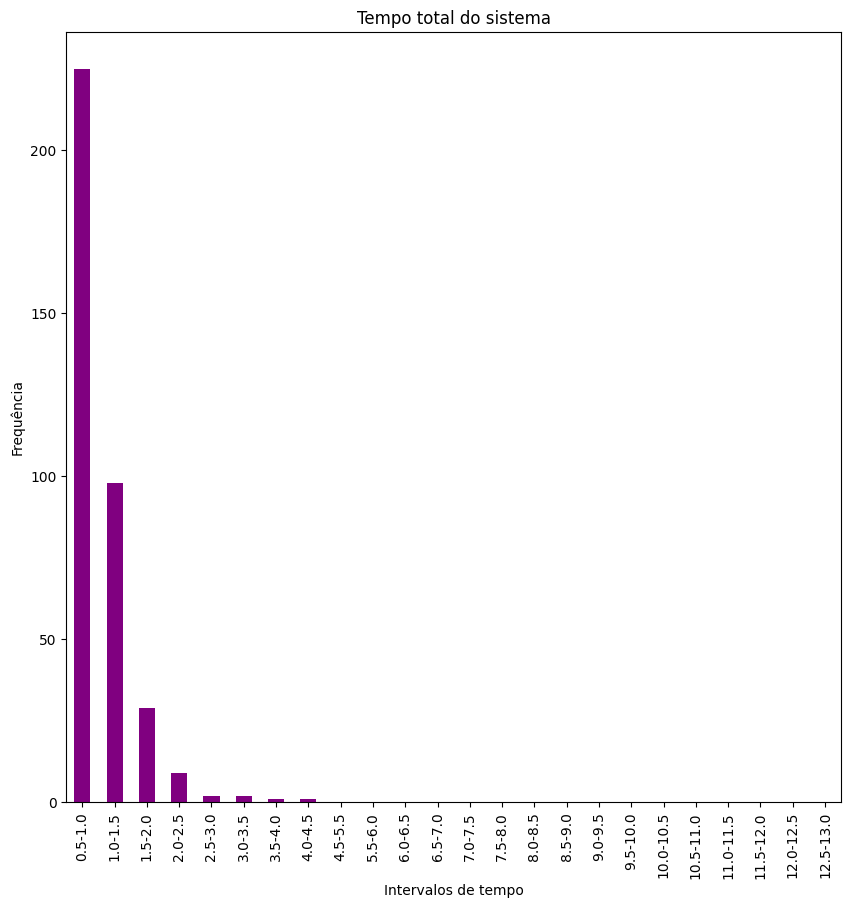

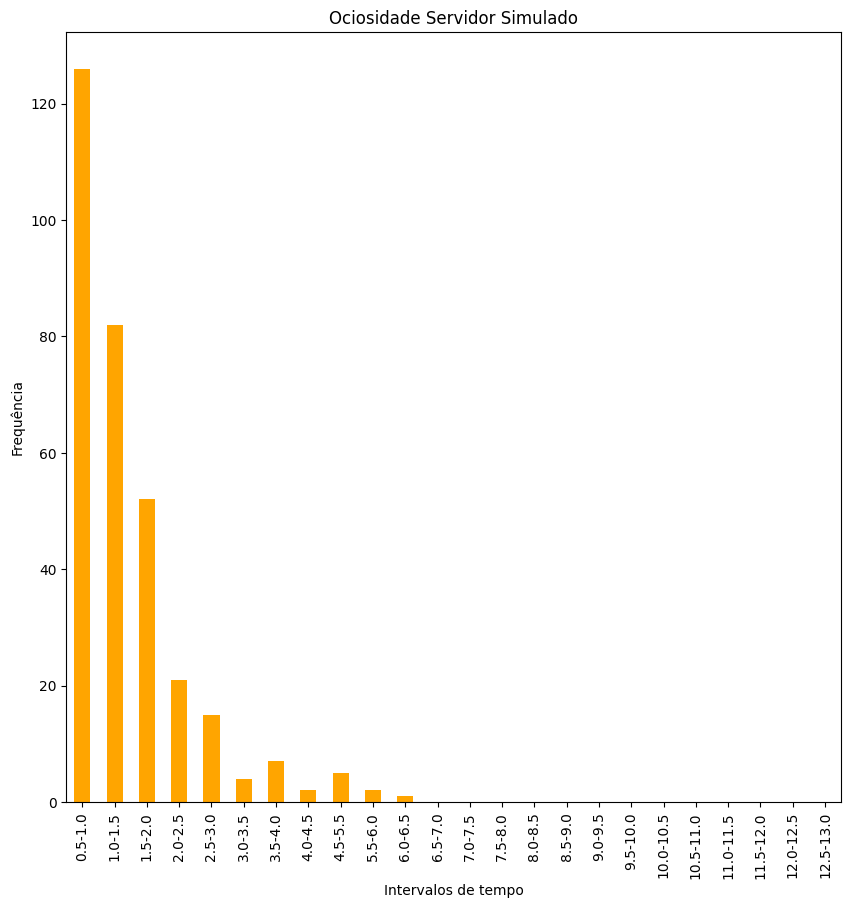

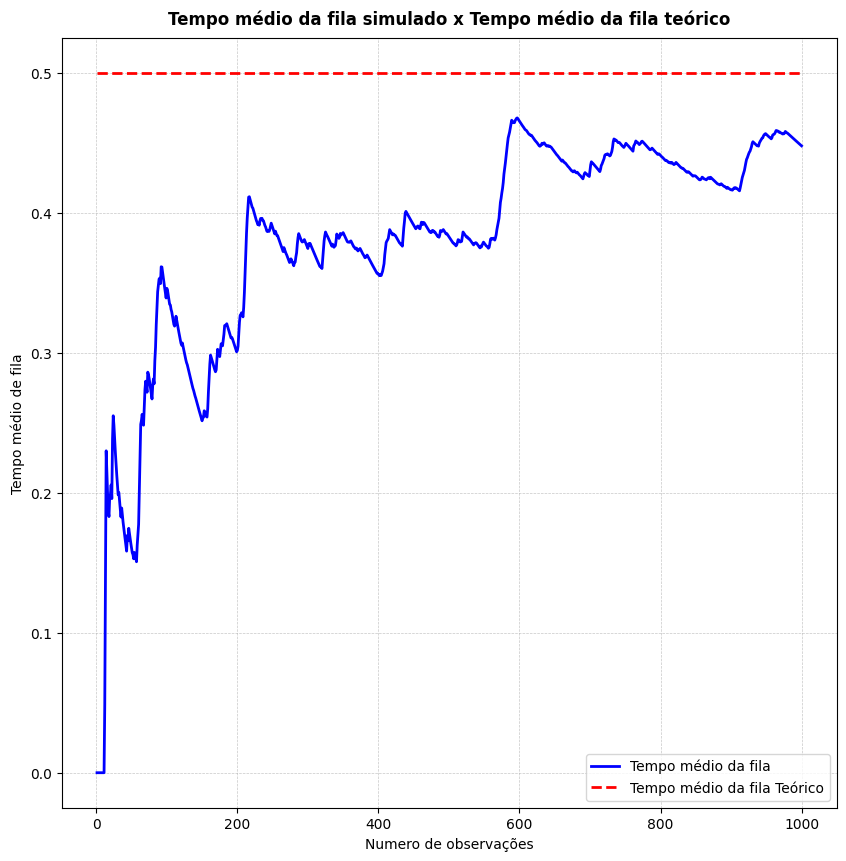

In [13]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_3,wq)


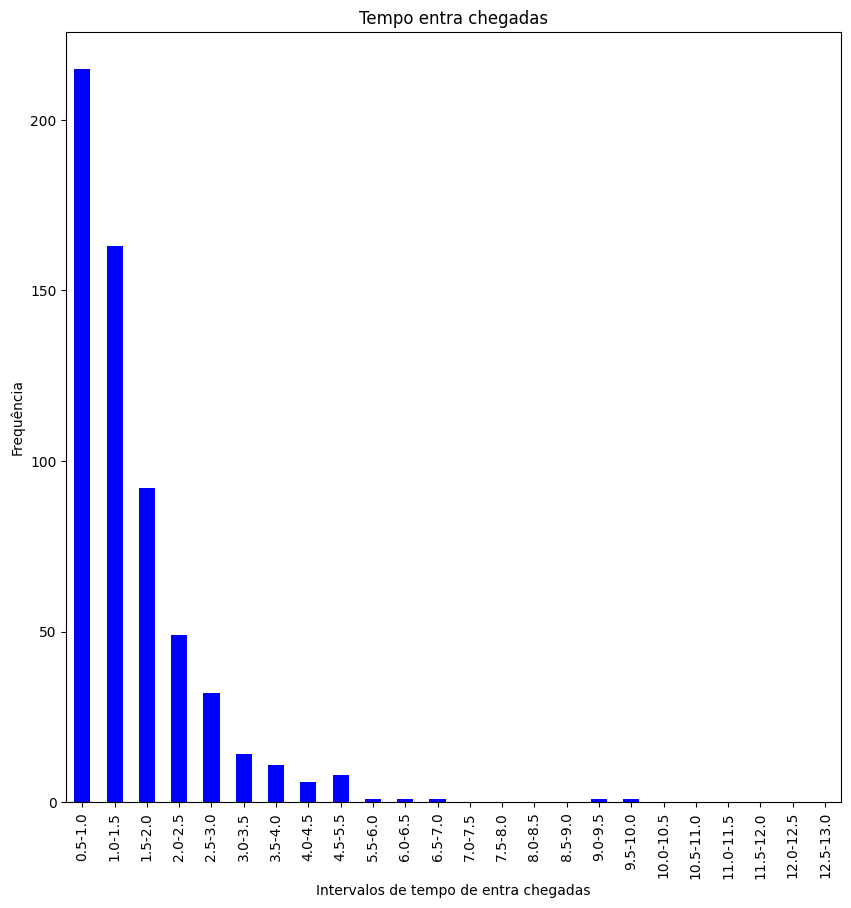

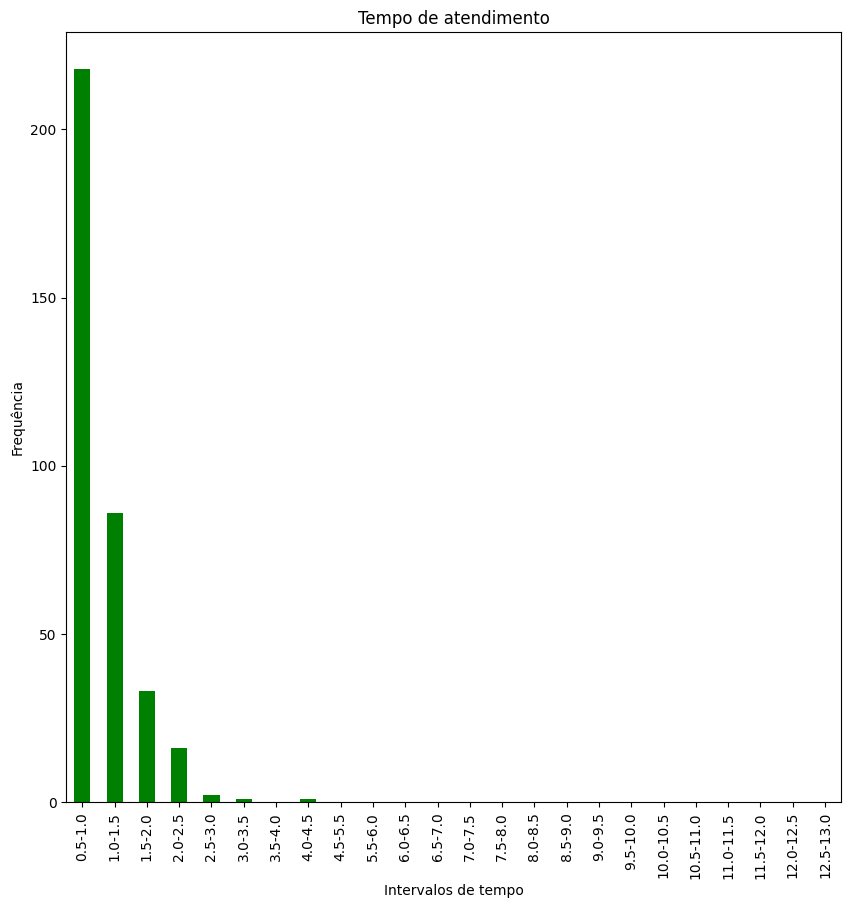

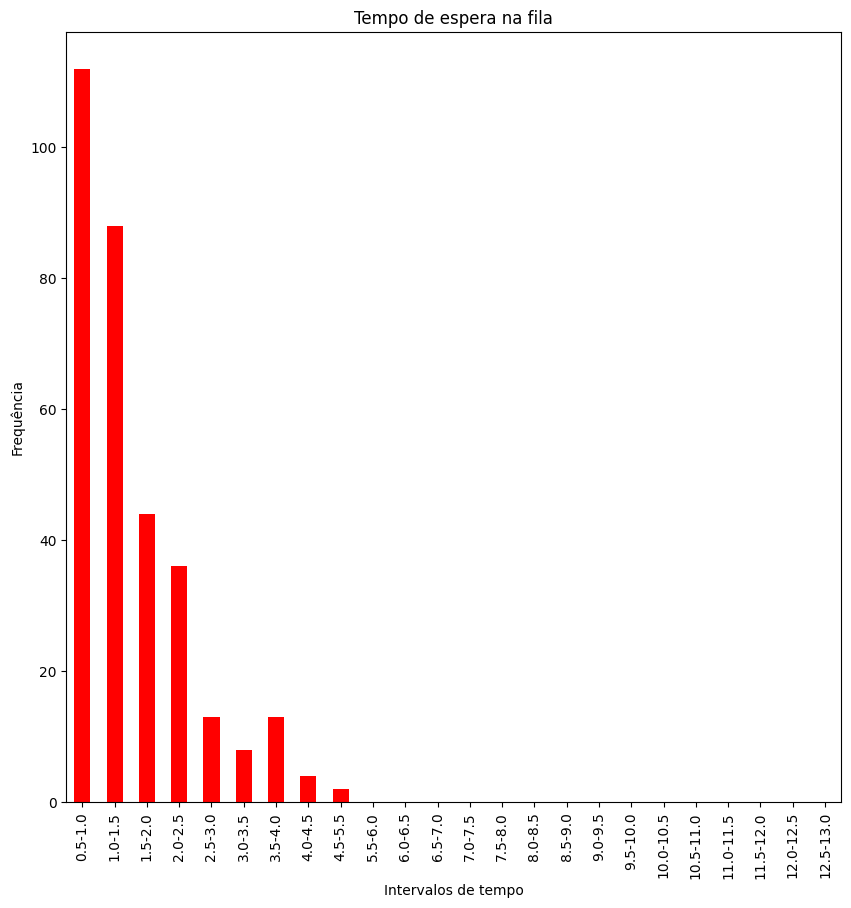

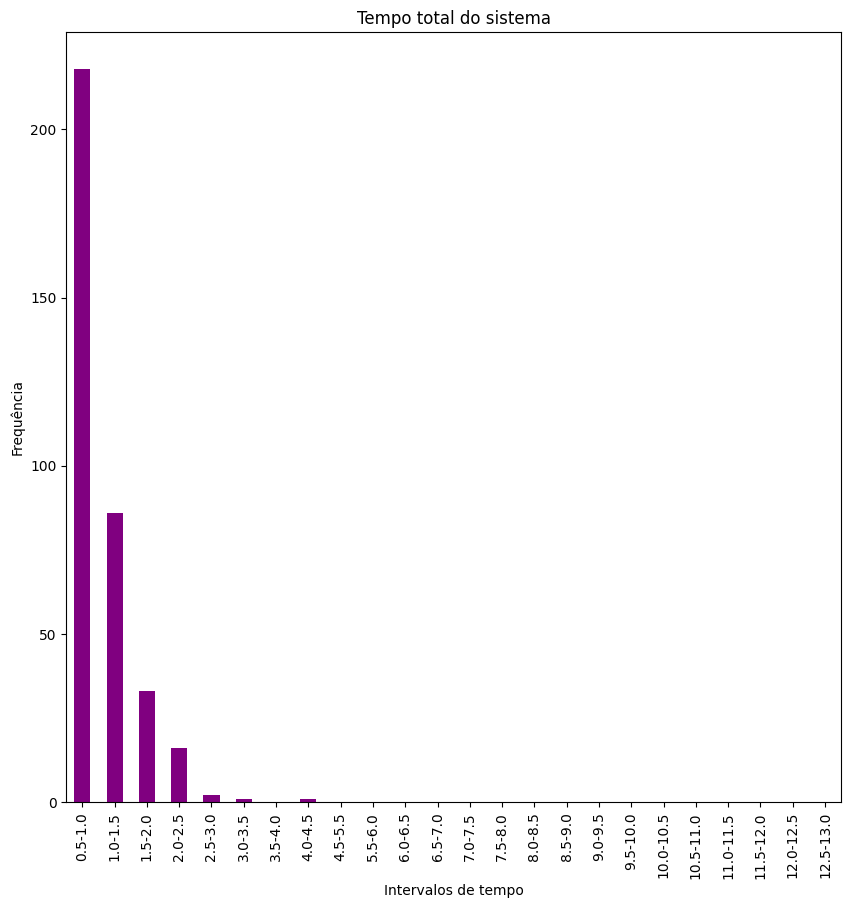

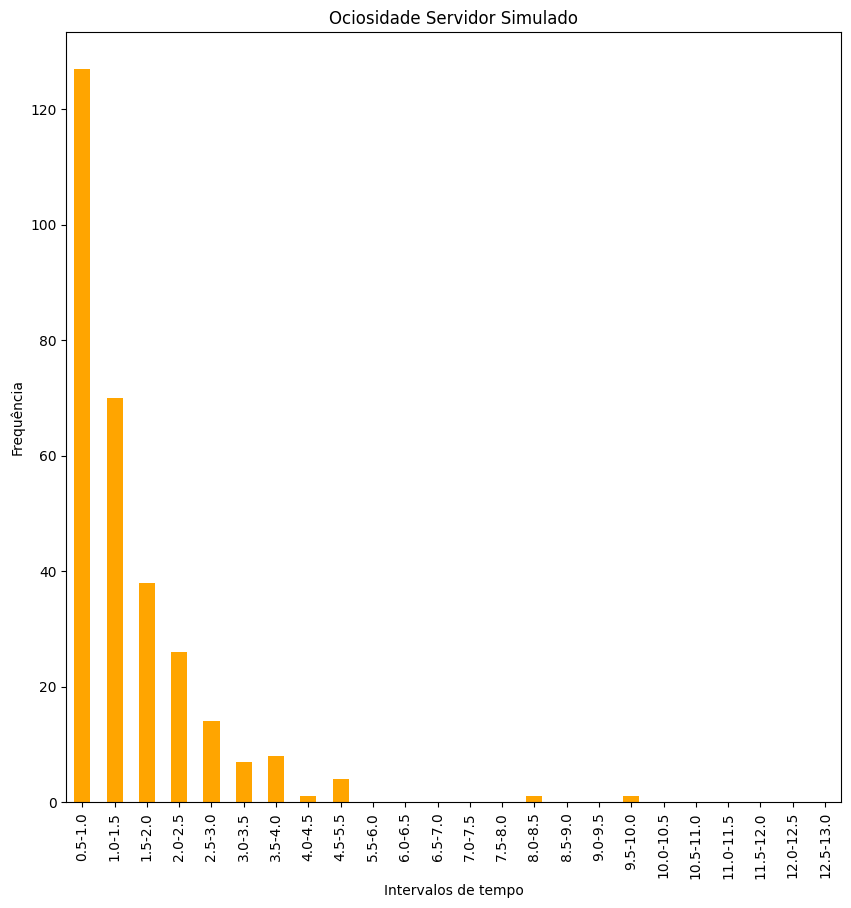

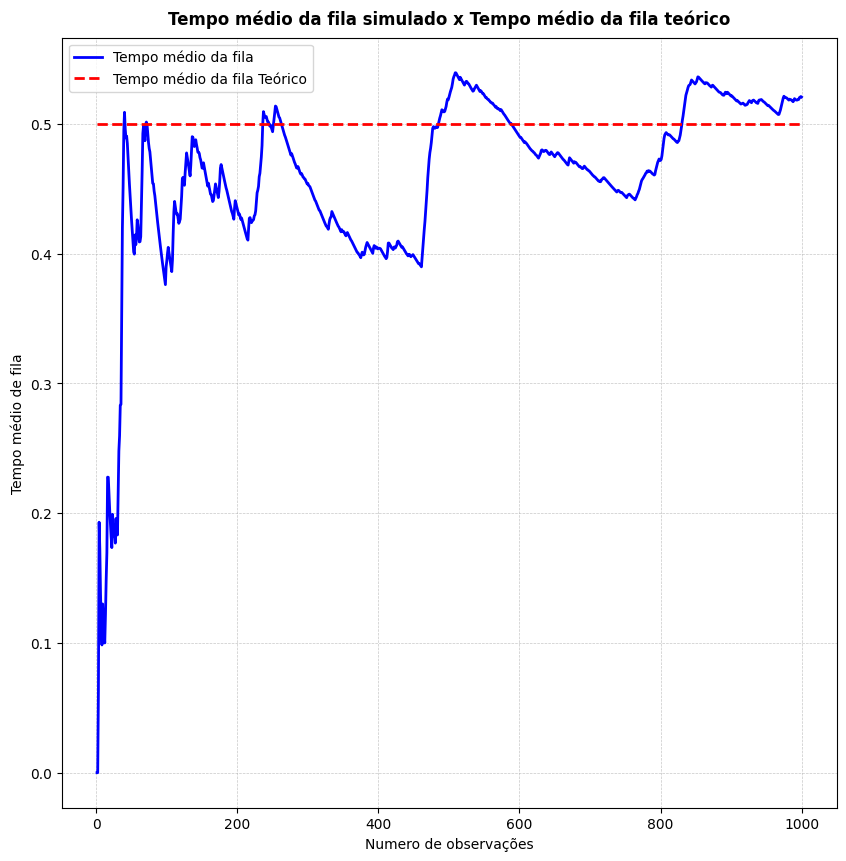

In [14]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_4,wq)


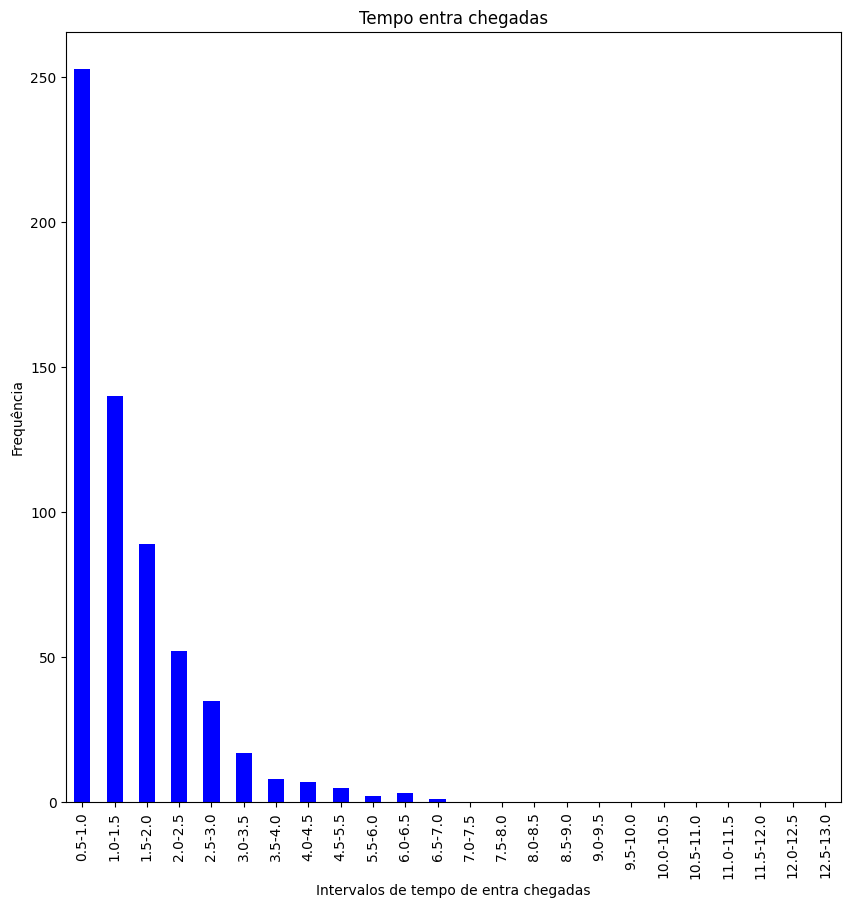

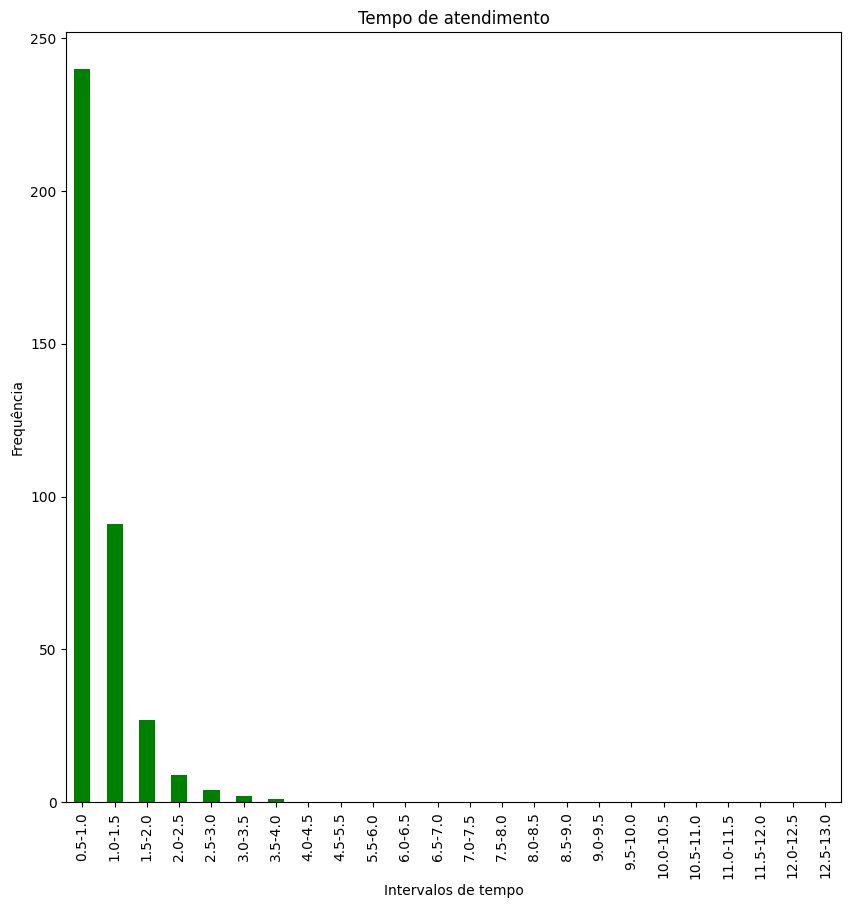

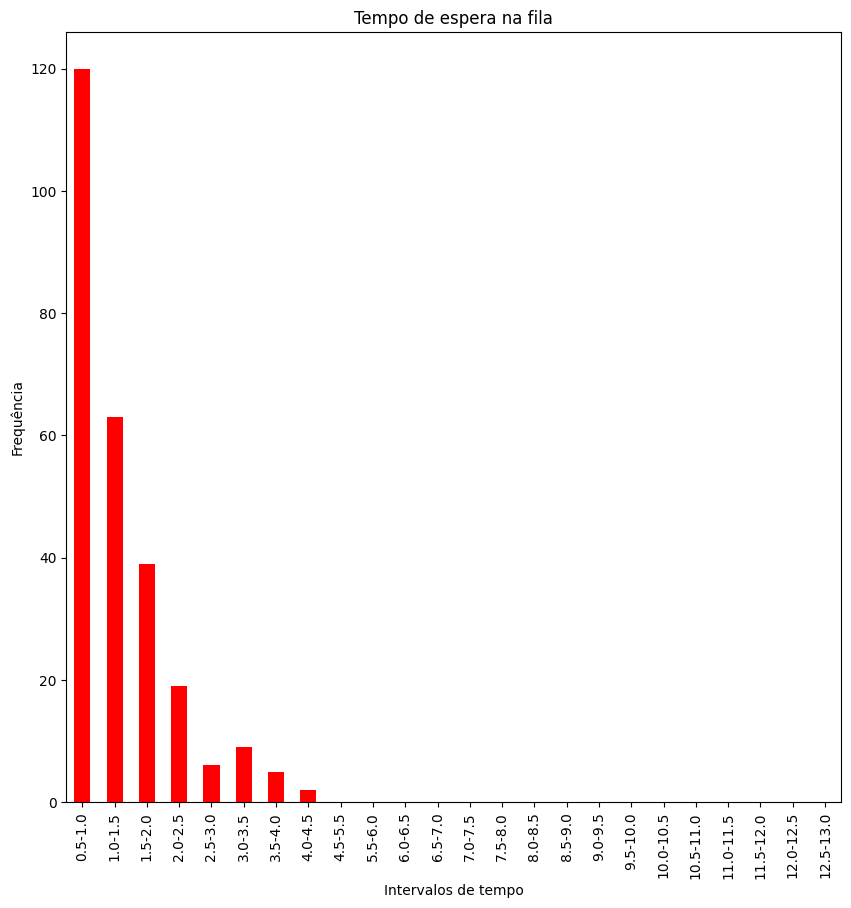

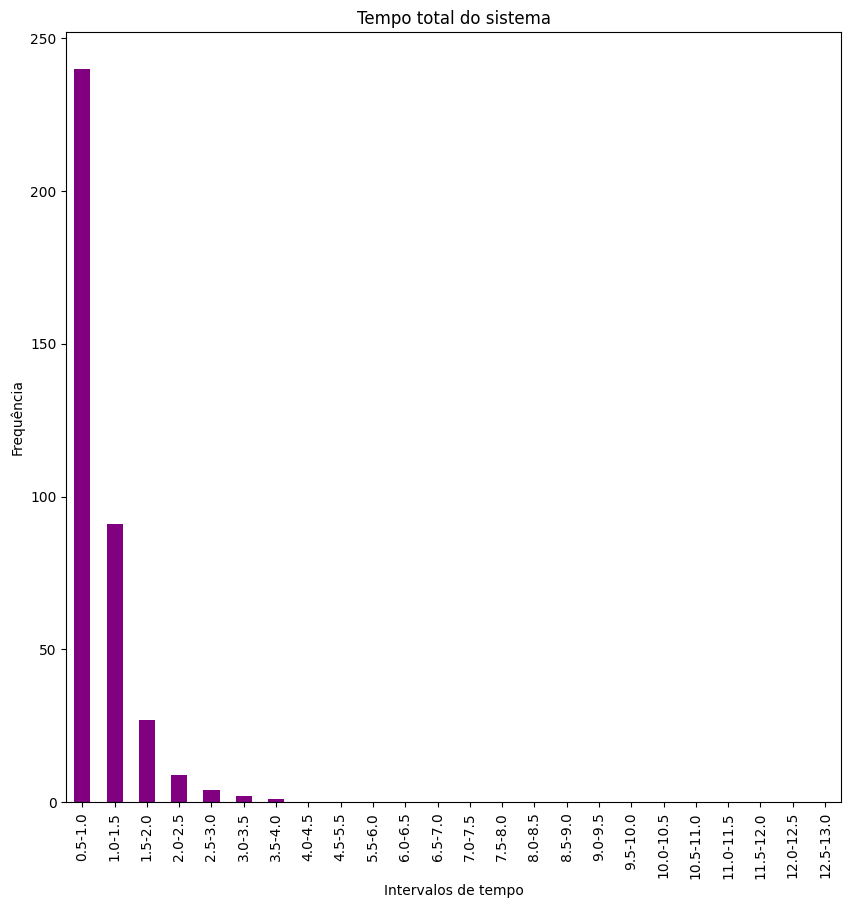

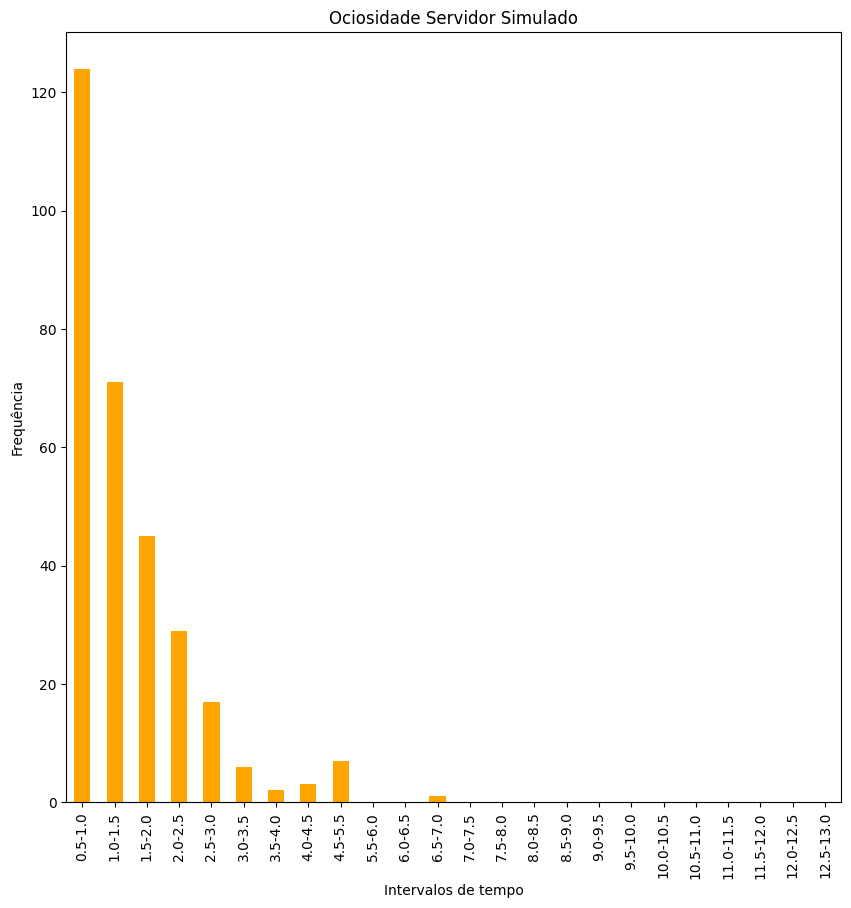

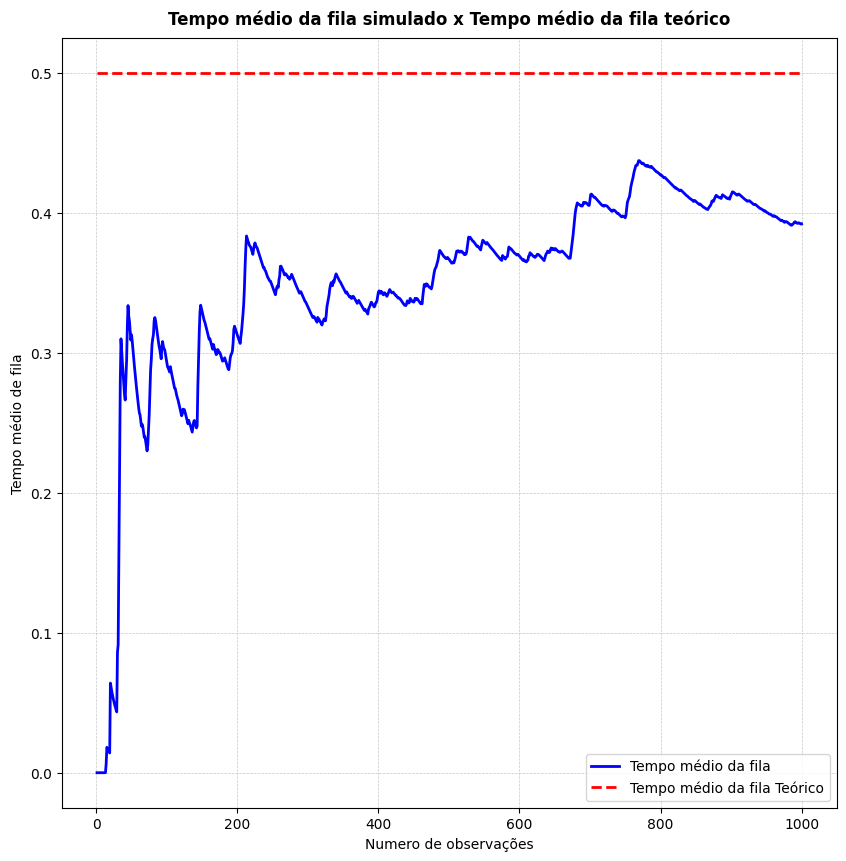

In [15]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_5,wq)

In [22]:
tempo_medio_espera_replicações = pd.DataFrame(columns=['Tempo entre chegadas' , 'λ' , 'μ' , 'Simulação 01', 'Simulação 02','Simulação 03' , 'Simulação 04' , 'Simulação 05' , 'w médio' , 'Variância' , 'Wq teórico'])


In [ ]:

m_1 = dados_simulacao_1['Tempo de espera na fila'].mean()
m_2 = dados_simulacao_2['Tempo de espera na fila'].mean()
m_3 = dados_simulacao_3['Tempo de espera na fila'].mean()
m_4 = dados_simulacao_4['Tempo de espera na fila'].mean()
m_5 = dados_simulacao_5['Tempo de espera na fila'].mean()



media_tempo  =  (m_1 + m_2 + m_3 + m_4 + m_5) / 5


wq = l / (u * (u-l))

media = (media_tempo+wq)/2

variancia = (wq-media)**2 + (media_tempo-media)**2



tempo_medio_espera_replicações.loc[0]=[1,l,u,m_1,m_2,m_3,m_4,m_5,media_tempo,variancia , wq]





In [38]:
j = 1



dados_simulacao_aux = []

for i in range (0,5):
    
  dados_simulacao_aux.append(pd.DataFrame(columns=dados_simulacao_1.columns))


for i in range (0,7):
    
    j = j -0.1
    l = 1 / j;
    
    m = []
    
    
    
    for k in range (0,5):
      
      generate_simulation(dados_simulacao_aux[k])
      
      m.append(dados_simulacao_aux[k].mean())
      tempo_medio_espera_replicações.loc[i+1 , 'Simulação 0'+str(k+1)] = dados_simulacao_aux[k]['Tempo de espera na fila'].mean()  
      
    media_tempo = sum(m)/5
    
    
    wq = l / (u * (u-l))

    media = (media_tempo+wq)/2

    variancia = (wq-media)**2 + (media_tempo-media)**2
    
    
    
    
    
    
    tempo_medio_espera_replicações.loc[i+1 , ['Tempo entre chegadas' , 'λ' , 'μ' , 'w médio' , 'Variância' , 'Wq teórico']]=[1,l,u,media_tempo,variancia , wq]


tempo_medio_espera_replicações
  
    
    
    
    

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.